<h1>Compsci 361 Assignment 1</h1>
<hr width = "80%" color = "black"/>
<h2>Task 1</h2>
<p>Is contained in the submitted pdf.</p>

<h2>Task 2 </h2>
<h3>Part A/B</h3>
Implement the basic decision tree procedure as discussed in the lectures. Implement DecisionTree algorithm with a train procedure. Implement the information gain criterion as described in our lectures. In your report use one or two sentences to discuss the output (the output of the training procedure is the trained decision tree which is a representation of the if-then-else rules). You may print out your decision tree (you don't have to, however it might help you discuss the trained trees)  (This may be large - consider the best way to print it). Depth limiter contained in implimentation

<h5>Importing data and preparing</h5>

In [10]:
import pandas as pd
import numpy as np

global features 
features = ["0.Edible:","1.cap-shape:","2. cap-surface:","3. cap-color:","4. bruises?:","5. odour:","6. gill-attachment:","7. gill-spacing:","8. gill-size:","9. gill-color:","10. stalk-shape:","11. stalk-root:","12. stalk-surface-above-ring:","13. stalk-surface-below-ring:","14. stalk-color-above-ring:","15. stalk-color-below-ring:","16. veil-type:","17. veil-color:","18. ring-number:","19. ring-type:","20. spore-print-color:","21. population:","22. habitat:"]                
                                  
data_raw = pd.read_csv("agaricus-lepiota.data",sep = ",",header = None)
print(data_raw)

     0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0     p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1     e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2     e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3     p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4     e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
8119  e  k  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  b  c  l
8120  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  n  o  p  b  v  l
8121  e  f  s  n  f  n  a  c  b  n  ...  s  o  o  p  o  o  p  b  c  l
8122  p  k  y  n  f  y  f  c  n  b  ...  k  w  w  p  w  o  e  w  v  l
8123  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  o  c  l

[8124 rows x 23 columns]


Currently some examples contain missing data values. For simplicity these examples will be removed from the dataset.

Additionally at this point i will split the training and test data in a 70:30 split.


In [11]:
data = data_raw[~data_raw.isin(['?']).any(axis=1)]
partAandBData = data.sample(frac = 1, random_state = 120)

#need to shuffle data

#take first 70%
splitPoint = int(round(len(partAandBData)*0.7,0))

trainingDataAandB = partAandBData.iloc[:splitPoint]
testDataAandB = partAandBData.iloc[splitPoint:]

As you can see, 2.5 thousand rows have been removed as they contained "?" values. At this point, the data is in a form that can be used to create a decision tree.

<h4>Decision tree class</h4>
   <p> Firstly, the tree will split in a binary fashion such that each parent can 
    only have two children.</p>
    
<h5>Looking at the data stored in the DecisionTree class:</h5>
     <p>-maxDepth holds the allowed depth of the tree from its current point as we recursively go down the tree, this value decreases. The default value is 4.</p>
     
 <p>-dataset holds the relevant data at that node.</p>
     
 <p>-path is utilized in the string function to make visualizing the tree easier. It stores the left or right decisions.
     
 <p> Training is a value used to determine whether the tree should automatically call recursion or wait for the train method.</p>
     
  <p>-splitParam stores the index of the feature for the split and the value       on which the split occurs</p>
     
  <p>-condition stores whether the path from this node to the parent was ==         or != to the value on which the split occurred </p>
  
  <p>childleft/right store the nodes resulting from the recursive building</p> 
      
<h5>Methods</h5>

   <p>The train method is used to set up the tree after an instance has been created by calling the recursion function. This only needs to be done to the root as all decision trees created by the recursion method set the training variable to 1, which lets the tree call for recursion from the initialization.</p>
   
   <p> The entropy method calculates the entropy of a set of data</p>
   
   <p> The information gain method calculated the information gain using the entropy method on the current node and two datasets.</p>
 
 <p> The Splitting selection method does the bulk of the heavy lifting. It parses through all the features and their respective threshold values and finds the combination with the highest information gain. The feature and threshold are then stored in the split params list in the tree data structure for future use.</p>
  
  <p>The recursion method takes the outcome of the splitting selection and it creates two new trees with the datasets x = feature: value and x!=feature: value. These new trees are set up to automatically run recursion instead of .train() needing to be called. Additionally, these new trees have their path appended to reflect their position. The depth param is also reduced by 1. It should be noted that if the node is at max depth or if the entropy of the node is 0, it will not create any additional trees.</p>
   
 <p>The string method presents the data structure in a form that humans can interpret and allows for a manual visual construction.</p>
 
 <p> The test and accuracy methods will be further explained in sections C and D, respectivly </p>
    

In [19]:
class DecisionTree:
    
    def __init__(self,dataSet=None,maxDepth=4,condition = "N/A",path = "root,",training = 0):
        

        self.maxDepth = maxDepth
        self.dataSet = dataSet
        self.path = path
        self.training = training
        self.splitParam = self.splittingSelection()
        self.condition = condition
        self.childLeft = None
        self.childRight = None
        if self.training ==1:
            self.recursion()
        
            
    def getChildLeft(self):
        return self.childLeft
    
    def getChildRight(self):
        return self.childRight
        
    def train(self):
        self.recursion()
    
    #calculating entropy    
    def entropy(self,data):
         #count the number of rows
        size = len(data)
        
        #count the number of rows where the condition is met and the example is edible
        countEdible = len(data[data[0]=="e"])
        
        #check for math errors in log by skipping if countEdible/size = 0
        
        if size == 0 or countEdible/size == 0 or countEdible/size == 1:
            return 0
        
        entropy = (-(countEdible/size)*np.log2(countEdible/size)
                   -((size -countEdible)/size)*np.log2((size -countEdible)/size))
        
        return entropy
                                                         
    #calculating informationgain using entropy                                                 
    def informationGain(self,data1,data2):
        size = len(self.dataSet)
        informationGain = (self.entropy(self.dataSet) - (len(data1)/size)*(self.entropy(data1))
                           -(len(data2)/size)*self.entropy(data2))
        return informationGain
    
    
    def splittingSelection(self):
        maxInformationGain = -1
        indexmax = None
        value = None
        
        for index in range(1,len(self.dataSet.columns)):
            #identify all unique values in a row to split on
            thresholds = self.dataSet[index].unique()
            if len(thresholds) != 1:
                for threshold in thresholds:
                    #parse through all thresholds for a column and create datasets
                    modifiable = self.dataSet
                    data1 = modifiable[(modifiable[index] == threshold)]
                    
                    data2 = modifiable[(modifiable[index] != threshold)]
                    infoGainTemp = self.informationGain(data1,data2)
                    if infoGainTemp > maxInformationGain:
                        maxInformationGain = infoGainTemp
                        indexmax = index
                        value = threshold
        
        return [indexmax,value]
        
        
        
    def recursion(self):
        
        if (self.entropy(self.dataSet) != 0) == True & (self.maxDepth != 0) == True:
            modifiable = self.dataSet
            index = self.splitParam[0]
            threshold =self.splitParam[1]
            
            
           
            self.childLeft = DecisionTree(modifiable[(modifiable[index] == threshold)],
                                          maxDepth = self.maxDepth - 1,condition = "==",path = self.path +"Left,",training = 1)
            
            self.childRight = DecisionTree(modifiable[(modifiable[index] != threshold)]
                                           ,maxDepth = self.maxDepth - 1,condition = "!=",path = self.path +"Right,",training = 1)
            
    
    
    def accuracy(self,dataSet):
        #if at leaf need to return number correct in dataset and total number at leaf
        if (self.entropy(self.dataSet) == 0 or (self.maxDepth == 0) == True):
            leafValue = self.dataSet[0].mode()[0]
            dataSize = len(dataSet)
            correctSize = len(dataSet.loc[dataSet[0] == leafValue])
            return [correctSize,dataSize]
        
        else:
            index = self.splitParam[0]
            threshold =self.splitParam[1]
            leftAccuracy = self.childLeft.accuracy(dataSet[(dataSet[index] == threshold)])
            rightAccuracy = self.childRight.accuracy(dataSet[(dataSet[index] != threshold)])
            return [leftAccuracy[0] + rightAccuracy[0],leftAccuracy[1] + rightAccuracy[1]]              
                              
    def test(self,data):
        
        if (self.entropy(self.dataSet) == 0) == True or ((self.maxDepth == 0) == True):
            
            prediction = leafValue = self.dataSet[0].mode()[0]
            actual = data[0].mode()[0]
            return [actual,prediction]
        else:
            index = self.splitParam[0]
            threshold =self.splitParam[1]

            #if condition = value test left tree and if != test right tree
            if ((data.iloc[0][index] == threshold)):
                return self.childLeft.test(data)
            
            else:
                return self.childRight.test(data)
            
    def printDT(self):
        print(self)
        if self.childLeft != None:
            self.childLeft.printDT()
        if self.childRight != None:
            self.childRight.printDT()
            
        
    def __str__(self):
        if (self.entropy(self.dataSet) == 0) == True:
            value = self.dataSet[0].mode()[0]
            
            string = "------------------\nPath = " + self.path +"\nEdible = "+ value + "\n"
        
        elif (self.maxDepth == 0) == True:
            
            value = self.dataSet[0].mode()[0]
            
            string = "------------------\nPath = " + self.path +"\nEdible = "+ value + "\nat max depth \n"
            
        
        else:
            
            string = "------------------\nPath = " + self.path +"\nFeature = "+ features[self.splitParam[0]] + "\nValue = "+ self.splitParam[1] + "\n"
        
        
        
        return string + "Condition = " + self.condition +"\n"
    
    

<h4>Demonstration</h4>
This subsection will demonstrate the formation/shape of the decision trees. As well as look at the impact of the max depth parameter on the decision tree.Note I've interpreted depth as the root having depth of 0. This will also serve as a demonstration of the string and print methods which formats the individual decision trees into something comprehendable however still needs to be interpreted into a tree shape.

Starting with a max depth of two

In [20]:
#using the data calculated at the start of this section with a 70:30 split
#into training and testing respectivly
#the same training data will be used for all DTs the only difference will be max depth

dtdepth2 = DecisionTree(trainingDataAandB,2)
dtdepth2.train()
dtdepth2.printDT()

------------------
Path = root,
Feature = 5. odour:
Value = f
Condition = N/A

------------------
Path = root,Left,
Edible = p
Condition = ==

------------------
Path = root,Right,
Feature = 8. gill-size:
Value = b
Condition = !=

------------------
Path = root,Right,Left,
Edible = e
at max depth 
Condition = ==

------------------
Path = root,Right,Right,
Edible = p
at max depth 
Condition = !=



Due to my limited abilty I couldn't work out a way to actually print it as a tree i'll have to maually draw it. However from the print out it isn't too bad. The path represents the location of the node relative to the root,for leaf nodes the edible = x is the prediction at that node. The condition is relative to the node above i.e == means that the data has agreed with the condition specified by the prior node, != means the opposite. Note == always goes Left and != always goes right.

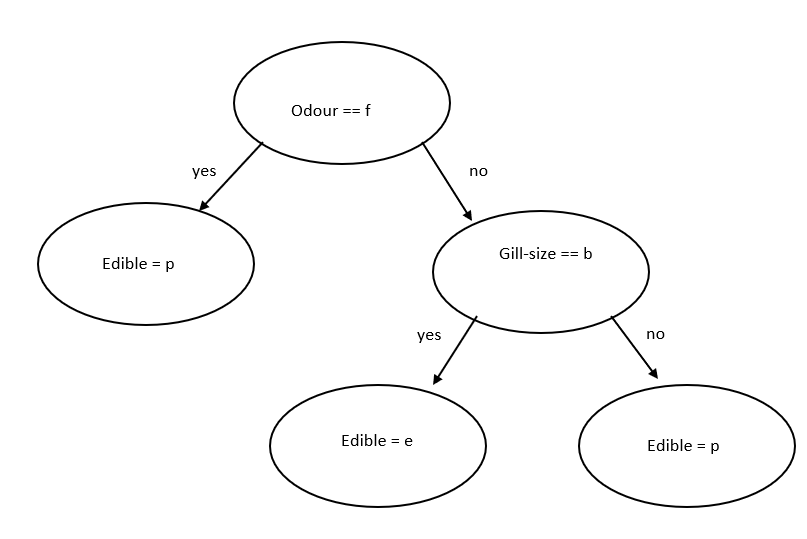

max depth 3

In [14]:
dtdepth3 = DecisionTree(trainingDataAandB,3)
dtdepth3.train()
dtdepth3.printDT()

------------------
Path = root,
Feature = 5. odour:
Value = f
Condition = N/A

------------------
Path = root,Left,
Edible = p
Condition = ==

------------------
Path = root,Right,
Feature = 8. gill-size:
Value = b
Condition = !=

------------------
Path = root,Right,Left,
Feature = 18. ring-number:
Value = o
Condition = ==

------------------
Path = root,Right,Left,Left,
Edible = e
Condition = ==

------------------
Path = root,Right,Left,Right,
Edible = p
at max depth 
Condition = !=

------------------
Path = root,Right,Right,
Feature = 5. odour:
Value = p
Condition = !=

------------------
Path = root,Right,Right,Left,
Edible = p
Condition = ==

------------------
Path = root,Right,Right,Right,
Edible = e
at max depth 
Condition = !=



Visually this looks like
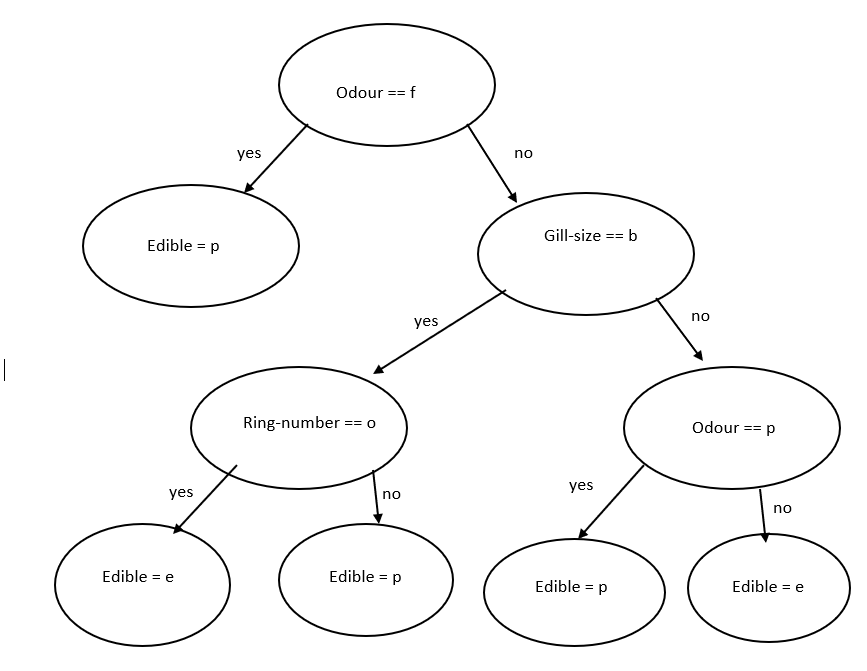
An observation so far, nothing has changed about the non-leaf nodes between depth 2 and 3. i.e the root splits on the same feature and value.

In [15]:
dtdepth4 = DecisionTree(trainingDataAandB,4)
dtdepth4.train()
dtdepth4.printDT()

------------------
Path = root,
Feature = 5. odour:
Value = f
Condition = N/A

------------------
Path = root,Left,
Edible = p
Condition = ==

------------------
Path = root,Right,
Feature = 8. gill-size:
Value = b
Condition = !=

------------------
Path = root,Right,Left,
Feature = 18. ring-number:
Value = o
Condition = ==

------------------
Path = root,Right,Left,Left,
Edible = e
Condition = ==

------------------
Path = root,Right,Left,Right,
Feature = 22. habitat:
Value = p
Condition = !=

------------------
Path = root,Right,Left,Right,Left,
Edible = e
Condition = ==

------------------
Path = root,Right,Left,Right,Right,
Edible = p
at max depth 
Condition = !=

------------------
Path = root,Right,Right,
Feature = 5. odour:
Value = p
Condition = !=

------------------
Path = root,Right,Right,Left,
Edible = p
Condition = ==

------------------
Path = root,Right,Right,Right,
Feature = 5. odour:
Value = c
Condition = !=

------------------
Path = root,Right,Right,Right,Left,
Edible

Visually this looks like this:
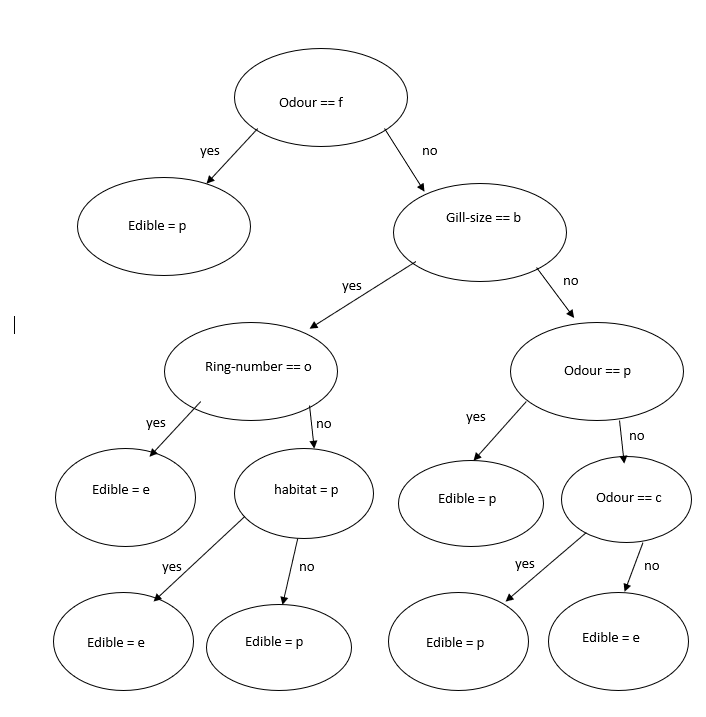

Describing the decision tree with a max depth of 4:
<p>The root of the decision tree splits on the odour of the mushroom being f: foul. If a mushroom smells foul, it is poisonous. However, if it is not foul smelling, we move to the node that splits on gill size equalling b: broad. If the mushroom satisfies that condition, it moves to a node that splits on the ring number being o: one. If the mushroom has one ring, it is edible. However, if not, it is split at the next node that splits on habitat being p: paths. If the habitat is a path, the mushroom is edible; if not, it is poisonous. Backtracking to the node that splits on gill-size, if this condition is not met, the next node splits on odour again, this time equalling p: pungent; if it is pungent, it is poisonous. Otherwise, it is split on odour again, this time equalling c: creosote. If it smells like creosote, it is poisonous; otherwise, it is edible.</p>
<p>Some observations looking at all depth levels. Odour is an important variable being used as a condition in half the nodes. Additionally, through further testing, the training on this dataset maxes out at a depth of 6. Increasing the max depth parameter above that makes no difference, as all leaf nodes have entropy = 0. However, this may differ based on the training set.</p>

<p>Lastly, all the nodes not at the depth limit remain the same. This makes sense, considering that at each node, the decision tree is looking to make the split based on the feature: value combination that maximises information gain. This won't change in response to depth, as the max info gain for the first split is just how the initial dataset is split to maximise information gain. However, this raises an interesting question; firstly, could you calculate max infogain as a sum of information gained from this split and the splits the children could make? Secondly, how would this impact the formation of the decision tree?</p>

<h3>Part C</h3>
Implement a test procedure for your DecisionTree algorithm (a procedure that takes new data and the trained model and returns a prediction).  Describe your test evaluation. 




In [16]:
def testProcedure(dt,data):
    predictions = [["actual","prediction"]]
    #parse through data and send each row individually
    for index in range(1,len(data)):
        
        predictions.append(dt.test(data.iloc[[index]]))
    
    print(predictions)


<h4>Test procedure</h4>
The code above takes a set of data, and it returns the decision tree prediction and the actual value(for comparison) as to whether the mushroom is edible. This is achieved by parsing through each row of the data individually and using the test method in the decision tree class</p>
<p>The test method in the decision tree class first assesses whether it is a leaf or not. If it is a leaf, it will return a list of the actual and predicted value. The predicted value at the leaf is calculated based on the residing dataset on that leaf. Either the entropy = 0, at which point there is only one value in the edible column, or it takes the mode when the depth limit has been hit. <p>Once returned, these values are appended to the predictions list, which is then printed once the for loop is finished.</p><h4>Demonstration</h4>

In [17]:
#create a random training and testing set
partCData = data.sample(frac = 1, random_state = 210)

splitPoint = int(round(len(partCData)*0.7,0))

trainingDataC = partCData.iloc[:splitPoint]
#only taking a limited sample for demonstrative purposes
testDataC = partCData.iloc[splitPoint:splitPoint+20]

#create a new decision tree with the training data,ote the depth is 1
#to show that prediction can differ from the actual
testDT1 = DecisionTree(trainingDataC,1)
testDT1.train()
print("Testing a subset of the dataset on a DT limited to a depth of 1")
testProcedure(testDT1,testDataC)
#depth = 4
testDT4 = DecisionTree(trainingDataC,4)
testDT4.train()
#same test dataset
print("Testing a subset of the dataset on a DT limited to a depth of 4")
testProcedure(testDT4,testDataC)

Testing a subset of the dataset on a DT limited to a depth of 1
[['actual', 'prediction'], ['p', 'e'], ['e', 'e'], ['e', 'e'], ['p', 'p'], ['p', 'p'], ['p', 'p'], ['e', 'e'], ['e', 'e'], ['e', 'e'], ['p', 'p'], ['e', 'e'], ['p', 'e'], ['p', 'e'], ['e', 'e'], ['p', 'e'], ['e', 'e'], ['p', 'p'], ['p', 'p'], ['p', 'p']]
Testing a subset of the dataset on a DT limited to a depth of 4
[['actual', 'prediction'], ['p', 'p'], ['e', 'e'], ['e', 'e'], ['p', 'p'], ['p', 'p'], ['p', 'p'], ['e', 'e'], ['e', 'e'], ['e', 'e'], ['p', 'p'], ['e', 'e'], ['p', 'p'], ['p', 'p'], ['e', 'e'], ['p', 'p'], ['e', 'e'], ['p', 'p'], ['p', 'p'], ['p', 'p']]


<h4>Test evaluation</h4>
When the depth of the tree is limited to 1, the prediction is right 80% of the time. However, when the depth is increased to 4, the prediction is correct 100% of the time on this small dataset. Note that this method isn't designed to calculate the percentage correctness of the decision tree. It is designed to predict whether an example is edible or not. Calculating the % accuracy of the decision tree on a dataset has a specific method; accuracy(), which is designed to take a large dataset and compute the percentage accuracy of the decision tree in relation to the dataset. This will be further discussed in Part D, where it is my primary means of evaluating the performance of the decision tree.

<h3>Part D</h3>

<h4>Evaluation function</h4>
<p>In this section want to create a function that evaluates everything done so far. So it should train the tree given a dataset and calculate a performance measure.</p>

In [18]:
def evaluate(data):
    #shuffle data
    partDData = data.sample(frac = 1, random_state = 412)

    #take first 70% for training and 30% for testing
    splitPoint = int(round(len(partDData)*0.5,0))

    trainingDataD = partDData.iloc[:splitPoint]
    testDataD = partDData.iloc[splitPoint:]
    
    #create and train decision tree starting with max depth 4
    dtPartD = DecisionTree(trainingDataD,4)
    dtPartD.train()
    
    #measure performance on test data and training data
    portions = dtPartD.accuracy(testDataD)
    accuracy = str(portions[0]/portions[1] * 100) +"%"
    
    print("The accuracy of the decision tree on the test data set is")
    print("[correct,size of data]")
    print(portions)
    print("this equates to an accuracy of " +accuracy+"\n")
    
    portions = dtPartD.accuracy(trainingDataD)
    accuracy = str(portions[0]/portions[1] * 100) +"%"
    print("The accuracy of the decision tree on the training data set is")
    print("[correct,size of data]")
    print(portions)
    print("this equates to an accuracy of " +accuracy)
    
evaluate(data)

The accuracy of the decision tree on the test data set is
[correct,size of data]
[2791, 2822]
this equates to an accuracy of 98.90148830616585%

The accuracy of the decision tree on the training data set is
[correct,size of data]
[2789, 2822]
this equates to an accuracy of 98.83061658398299%


<p> The evaluation function is quite simple given the preprocessed data from partA/B; we rerandomize it to get the dataset for the evaluation. This dataset is then split into 70% training and 30% testing. The function then creates a decision tree with the data and a max depth parameter of 4. The tree is then trained, as discussed in part A/B. We then run .accuracy(data) to evaluate the performance of the decision tree.</p>

<p>The .accuracy() method takes a dataset and puts it through the trained decision tree. This is similar to the test() method, however, the accuracy method focuses on returning predicted values for the rows given. Accuracy, however, aims to return two numbers the size of the dataset and the number of rows whose predicted edible value matches the actual edible values(in hindsight, I could just measure the size of the dataset in the evaluation function and only return the number that is correct). This is achieved by parsing the tree recursively with the dataset. At each non-leaf node, it uses the condition to split the dataset accordingly and run the accuracy method on the children of the tree with their respective datasets. Once a leaf node is reached, the method measures the size of the dataset and the number of correct rows. These values are summed with other nodes as the recursion propagates back up. Resulting in a list where the first value is the number that is correct and the second value is the size of the dataset. The evaluate function then also presents this as a percentage for readability</p>
<p>The decision tree results are great, with a 99% accuracy on the test dataset. Furthermore, the evaluate method also prints out the accuracy of the training dataset, and it is also about 99% but slightly lower by a small fraction. This is an optimal result as it shows the decision tree effectively predicts if a mushroom is edible or poisonous on unseen data. Furthermore, the highness of both test and training accuracy would indicate that the decision tree has effectively trained itself.</p>

<p>Some other notes whilst experimenting with different depth values and the portion of the data used to train and test. Keeping all things equal, if the depth parameter of the decision tree is increased to 5, the training and test accuracy go to 100%. Alternatively, if the max depth parameter is reduced to 3, the accuracy of both the test and training data is still in the high 90%. Additionally, returning the depth to 4 if we reduce the size of the training set to half the total dataset, the accuracy of the training and test data is around 97%. I think these provide some insight into the fact that the problem has a definite solution</p>

<h2>Task 3</h2>


<h3>A.</h3>
<h4>Discuss what will happen if you decide to change the splitting criterion. Explain the new splitting criterion and how it might change your decision tree.</h4>

<p>Changing the splitting criterion will alter the selection of feature: value pairs, which determines how each node splits the dataset. Hence by changing the splitting criterion, we could alter the decision tree as different splitting criteria will prioritise different splits.</p>

<p> The current splitting criterion is the split that maximises information gain. An alternative method would be to use accuracy as a splitting criterion. Accuracy measures the percentage of rows in which the actual edible value would match the prediction. The decision tree would pick the feature value pair whose two sub-datasets have the highest accuracy. Hence by using accuracy to split instead of information gain, the splitting feature and value may be different. So each method may identify different combinations of feature: value in which to split. As such, the decision tree will be different. This could impact the accuracy either positively or negatively.</p>

<p>For example, instead of the first split being on the feature odour == f it could be on spore-print-color == brown.</p>Explain whether your evaluation method can indicate whether your tree is over- or underfitting.

<h2>B.</h2>
<h4>Explain whether your evaluation method can indicate whether your tree is over- or underfitting.</h4>
<p>My evaluation method can indicate whether the decision tree is under or over-fitting.</p>
<p> Overfitting occurs when the tree is over-trained on the training dataset. This can take the form of allowing an unlimited max depth. This complex decision tree is very deep and designed to identify specific examples and classify them. This is problematic as it may hinder the accuracy of unseen/test data. Overfitting is indicated by the accuracy of the training data being relatively high compared to the test data accuracy. The evaluate function makes identifying this problem easy as it prints out both the test and training data accuracy. So, it can be analyzed, and adjustments can be made to reduce overfitting</p>
<p>Underfitting is the opposite. It is caused by a parameter limiting the complexity of the decision tree. This results in the decision tree being unable to make enough splits of features: values that can predict the result(edibility in this case). Underfitting is problematic as it results in inadequate training and test data accuracy. Again the evaluate function makes this easy to identify as it prints the accuracy of the test and training data. Which can then be used to diagnose and fix the problem</p>
